In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_old = pd.read_csv('datasets/Ibovespa14anos.csv')
df = pd.read_csv('datasets/Ibovespa4anos.csv')
display(df.head(20))

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.05.2024,124.306,124.731,125.257,124.259,"9,21M","-0,34%"
1,23.05.2024,124.729,125.650,125.665,124.431,"9,99M","-0,73%"
2,22.05.2024,125.650,127.412,127.412,125.524,"12,40M","-1,38%"
3,21.05.2024,127.412,127.754,128.272,127.205,"9,14M","-0,27%"
4,20.05.2024,127.751,128.151,128.730,127.488,"9,34M","-0,31%"
5,17.05.2024,128.151,128.280,128.464,127.696,"10,26M","-0,10%"
6,16.05.2024,128.284,128.029,128.965,127.922,"9,86M","0,20%"
7,15.05.2024,128.028,128.514,128.646,127.029,"10,86M","-0,38%"
8,14.05.2024,128.515,128.155,128.965,127.962,"11,89M","0,28%"
9,13.05.2024,128.155,127.600,128.669,127.599,"8,92M","0,44%"


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1094 non-null   object 
 1   Último    1094 non-null   float64
 2   Abertura  1094 non-null   float64
 3   Máxima    1094 non-null   float64
 4   Mínima    1094 non-null   float64
 5   Vol.      1094 non-null   object 
 6   Var%      1094 non-null   object 
dtypes: float64(4), object(3)
memory usage: 60.0+ KB


In [48]:
df.rename(columns={'Vol.':'Vol','Var%':'Var'},inplace=True)

In [49]:
df.rename(columns={'Último.':'ultimo','Máxima':'maxima','Mínima':'minima','Vol':'vol','Var':'var'},inplace=True)

In [50]:
df.rename(columns={'Data':'data','Abertura':'abertura','Último':'ultimo'},inplace=True)

In [51]:
df.head(1)

,data,ultimo,abertura,maxima,minima,vol,var
0,24.05.2024,124.306,124.731,125.257,124.259,"9,21M","-0,34%"


In [52]:
df['data'] = pd.to_datetime(df['data'])

C:\Users\rpjun\AppData\Local\Temp\ipykernel_11272\338679594.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data'])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      1094 non-null   datetime64[ns]
 1   ultimo    1094 non-null   float64       
 2   abertura  1094 non-null   float64       
 3   maxima    1094 non-null   float64       
 4   minima    1094 non-null   float64       
 5   vol       1094 non-null   object        
 6   var       1094 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 60.0+ KB


In [54]:
df['dia'] = df['data'].dt.day
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year
df['dia_semana']=df['data'].dt.day_of_week

In [55]:
display(df.head(1))
display(df.info())

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
0,2024-05-24,124.306,124.731,125.257,124.259,"9,21M","-0,34%",24,5,2024,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        1094 non-null   datetime64[ns]
 1   ultimo      1094 non-null   float64       
 2   abertura    1094 non-null   float64       
 3   maxima      1094 non-null   float64       
 4   minima      1094 non-null   float64       
 5   vol         1094 non-null   object        
 6   var         1094 non-null   object        
 7   dia         1094 non-null   int32         
 8   mes         1094 non-null   int32         
 9   ano         1094 non-null   int32         
 10  dia_semana  1094 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4), object(2)
memory usage: 77.1+ KB


None

Vol (Volume) é em milhões
Var (variação) é em porcentagem

In [56]:
df['vol'] = df['vol'].str.replace('M','',regex=False)

In [57]:
df.head()

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
0,2024-05-24,124.306,124.731,125.257,124.259,"9,21","-0,34%",24,5,2024,4
1,2024-05-23,124.729,125.650,125.665,124.431,"9,99","-0,73%",23,5,2024,3
2,2024-05-22,125.650,127.412,127.412,125.524,"12,40","-1,38%",22,5,2024,2
3,2024-05-21,127.412,127.754,128.272,127.205,"9,14","-0,27%",21,5,2024,1
4,2024-05-20,127.751,128.151,128.730,127.488,"9,34","-0,31%",20,5,2024,0


In [58]:
df['var'] = df['var'].str.replace('%','',regex=False)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        1094 non-null   datetime64[ns]
 1   ultimo      1094 non-null   float64       
 2   abertura    1094 non-null   float64       
 3   maxima      1094 non-null   float64       
 4   minima      1094 non-null   float64       
 5   vol         1094 non-null   object        
 6   var         1094 non-null   object        
 7   dia         1094 non-null   int32         
 8   mes         1094 non-null   int32         
 9   ano         1094 non-null   int32         
 10  dia_semana  1094 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4), object(2)
memory usage: 77.1+ KB


In [60]:
df['vol'] = df['vol'].str.replace(',','.',regex=False)
df['var'] = df['var'].str.replace(',','.',regex=False)

In [61]:
df.head()

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
0,2024-05-24,124.306,124.731,125.257,124.259,9.21,-0.34,24,5,2024,4
1,2024-05-23,124.729,125.650,125.665,124.431,9.99,-0.73,23,5,2024,3
2,2024-05-22,125.650,127.412,127.412,125.524,12.40,-1.38,22,5,2024,2
3,2024-05-21,127.412,127.754,128.272,127.205,9.14,-0.27,21,5,2024,1
4,2024-05-20,127.751,128.151,128.730,127.488,9.34,-0.31,20,5,2024,0


In [62]:
df['vol'] = df['vol'].str.replace('K','',regex=False)

In [63]:
df['vol'].fillna('0',inplace=True)

C:\Users\rpjun\AppData\Local\Temp\ipykernel_11272\1881197955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vol'].fillna('0',inplace=True)


In [64]:
df['vol'] = df.vol.astype(float)
df['var'] = df['var'].astype(float)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        1094 non-null   datetime64[ns]
 1   ultimo      1094 non-null   float64       
 2   abertura    1094 non-null   float64       
 3   maxima      1094 non-null   float64       
 4   minima      1094 non-null   float64       
 5   vol         1094 non-null   float64       
 6   var         1094 non-null   float64       
 7   dia         1094 non-null   int32         
 8   mes         1094 non-null   int32         
 9   ano         1094 non-null   int32         
 10  dia_semana  1094 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(4)
memory usage: 77.1 KB


In [66]:
df.head(1)

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
0,2024-05-24,124.306,124.731,125.257,124.259,9.21,-0.34,24,5,2024,4


In [67]:
df_new = df.copy()

In [68]:
df_new.head(1)

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
0,2024-05-24,124.306,124.731,125.257,124.259,9.21,-0.34,24,5,2024,4


Cálculo de variação (feature var)
var = ((ultimo - abertura) / abertura) * 100

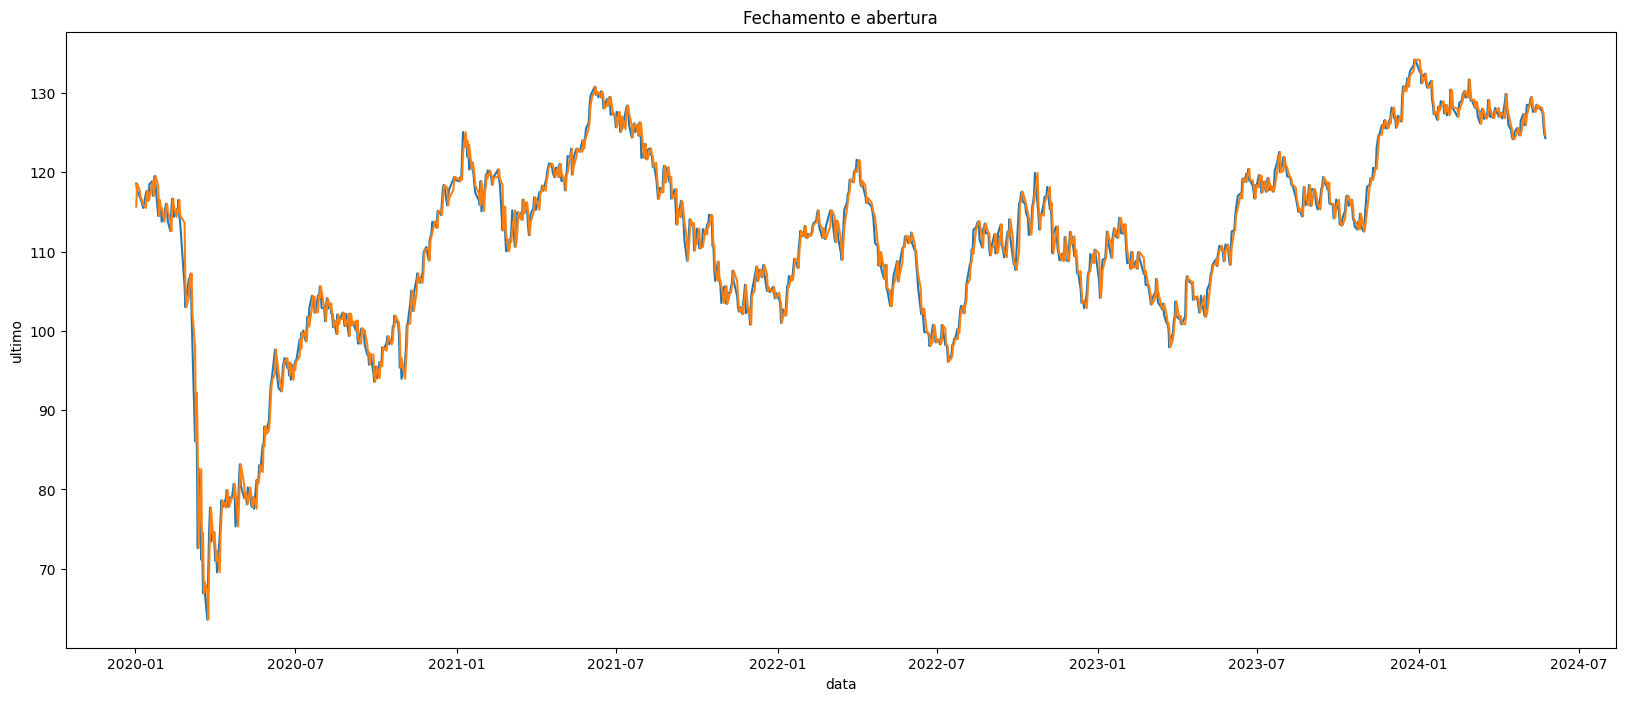

In [69]:
plt.figure(figsize=(20,8))
sns.lineplot(x='data',y='ultimo',data= df_new)
sns.lineplot(x='data',y='abertura',data= df_new)
plt.title('Fechamento e abertura')
plt.show()

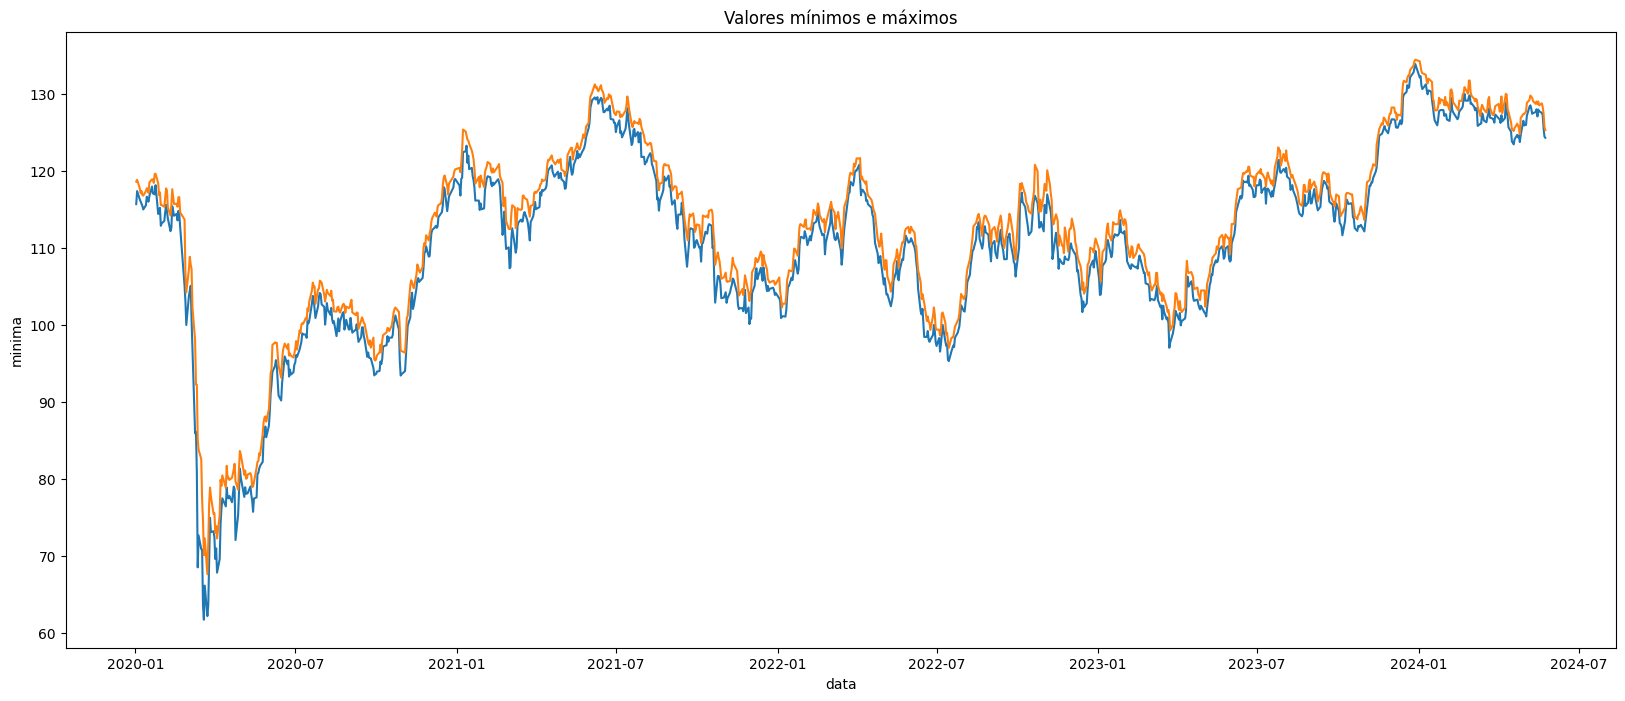

In [70]:
plt.figure(figsize=(20,8))
sns.lineplot(x='data',y='minima',data= df_new)
sns.lineplot(x='data',y='maxima',data= df_new)
plt.title('Valores mínimos e máximos')
plt.show()

In [71]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,data,ultimo,abertura,maxima,minima,vol,var,dia,mes,ano,dia_semana
data,1.000000,0.523256,0.521299,0.518928,0.528901,0.293878,0.007227,0.009800,0.053163,0.974626,-0.002268
ultimo,0.523256,1.000000,0.990687,0.996064,0.997377,-0.168139,0.058034,-0.015876,-0.049136,0.527301,0.005961
abertura,0.521299,0.990687,1.000000,0.996627,0.994352,-0.168991,-0.076151,-0.007864,-0.055716,0.526687,0.009010
maxima,0.518928,0.996064,0.996627,1.000000,0.995746,-0.156899,-0.012239,-0.015209,-0.054554,0.524224,0.007700
minima,0.528901,0.997377,0.994352,0.995746,1.000000,-0.181163,0.013067,-0.009494,-0.046414,0.532142,0.005551
vol,0.293878,-0.168139,-0.168991,-0.156899,-0.181163,1.000000,0.004862,-0.057788,0.135556,0.260776,0.167084
var,0.007227,0.058034,-0.076151,-0.012239,0.013067,0.004862,1.000000,-0.051041,0.040174,-0.000870,-0.024521
dia,0.009800,-0.015876,-0.007864,-0.015209,-0.009494,-0.057788,-0.051041,1.000000,0.007940,-0.010643,-0.013736
mes,0.053163,-0.049136,-0.055716,-0.054554,-0.046414,0.135556,0.040174,0.007940,1.000000,-0.170939,-0.005123
ano,0.974626,0.527301,0.526687,0.524224,0.532142,0.260776,-0.000870,-0.010643,-0.170939,1.000000,-0.000873


Questionamentos
1. o mês e/ano influencia na variação?
2. O volume influencia na variação?
3. Dia da semana influencia na variação?
4. Existem padrões sazonais?

Observações
1. A caracteristica ultimo será nosso target
2. as características abertura, maxima, minima são valores futuros
3. Data e ano são as duas caracteristicas mais propensas as infliuenciar no resultado final

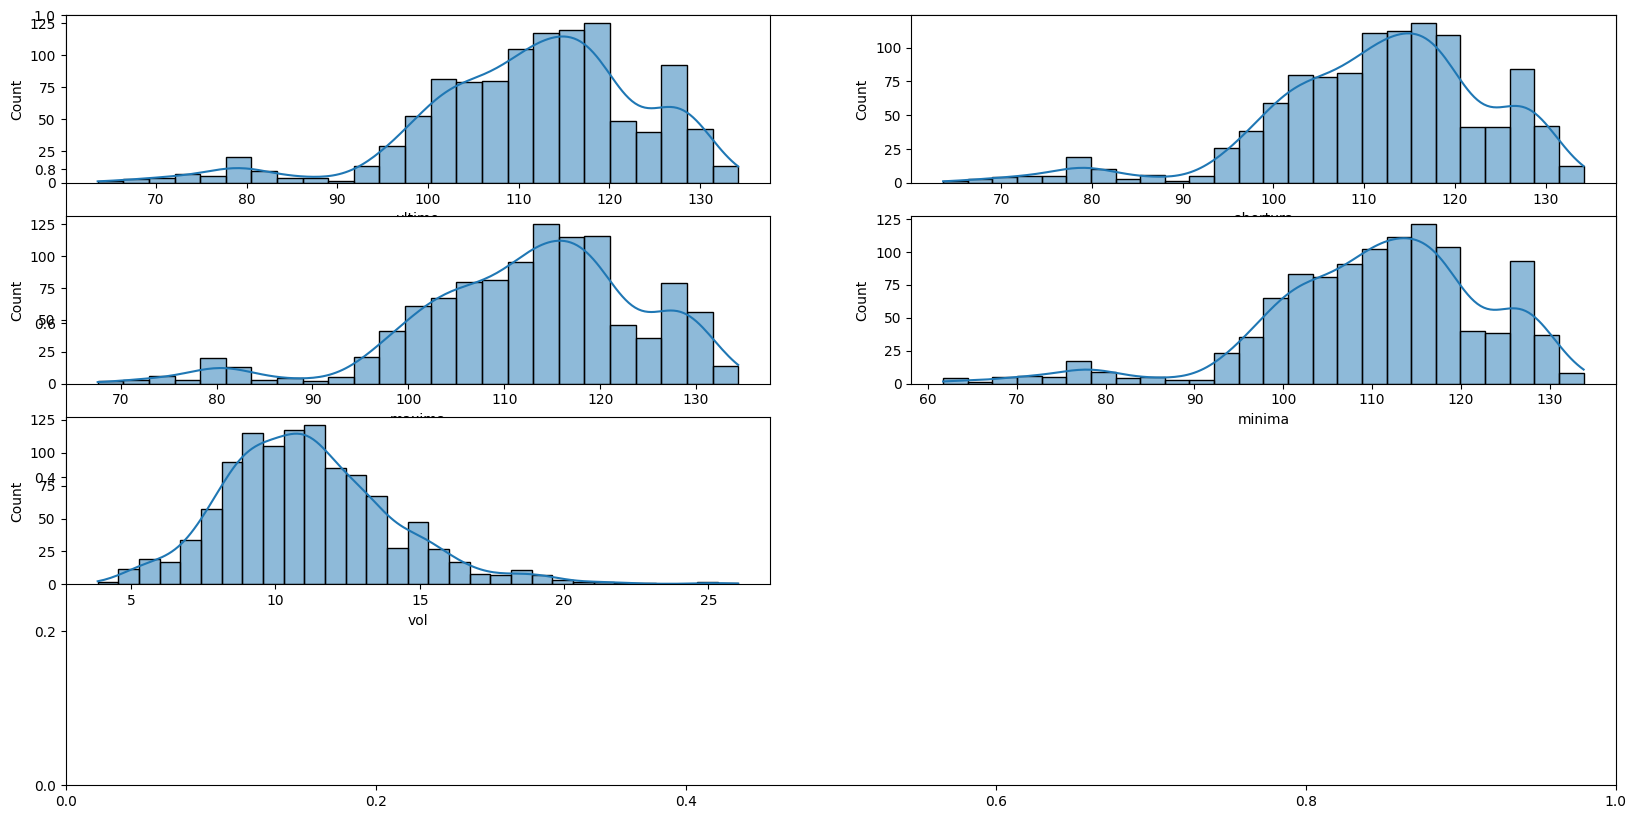

In [72]:
plt.subplots(figsize=(20,10))

plt.subplot(4,2,1)
sns.histplot(df_new['ultimo'],kde=True)

plt.subplot(4,2,2)
sns.histplot(df_new['abertura'],kde=True)

plt.subplot(4,2,3)
sns.histplot(df_new['maxima'],kde=True)

plt.subplot(4,2,4)
sns.histplot(df_new['minima'],kde=True)

plt.subplot(4,2,5)
sns.histplot(df_new['vol'],kde=True)

plt.show()


In [73]:
df_data = df_new[['data','ultimo']]

In [74]:
df_data.head()

,data,ultimo
0,2024-05-24,124.306
1,2024-05-23,124.729
2,2024-05-22,125.650
3,2024-05-21,127.412
4,2024-05-20,127.751


In [75]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1094 non-null   datetime64[ns]
 1   ultimo  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [76]:
df_data.index = pd.to_datetime(df_data.data,format='%m-%d-%Y')
df_data.drop(columns='data',inplace=True,axis=1)
df_data.head()

C:\Users\rpjun\AppData\Local\Temp\ipykernel_11272\255807116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(columns='data',inplace=True,axis=1)


,ultimo
data,
2024-05-24,124.306
2024-05-23,124.729
2024-05-22,125.650
2024-05-21,127.412
2024-05-20,127.751


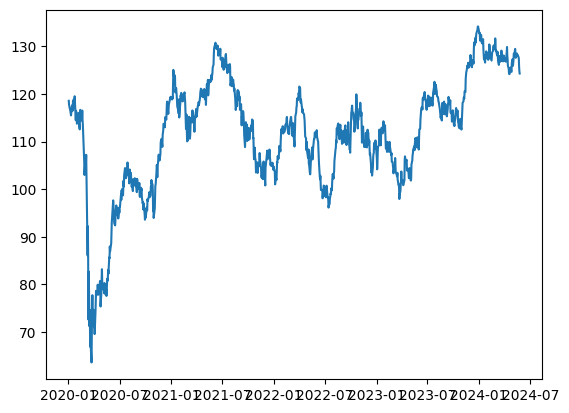

In [77]:
plt.plot(df_data.index, df_data.ultimo)

In [78]:
df_data.sort_index(inplace=True)

C:\Users\rpjun\AppData\Local\Temp\ipykernel_11272\419825027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.sort_index(inplace=True)


In [79]:
resultados = seasonal_decompose(df_data, period=365)

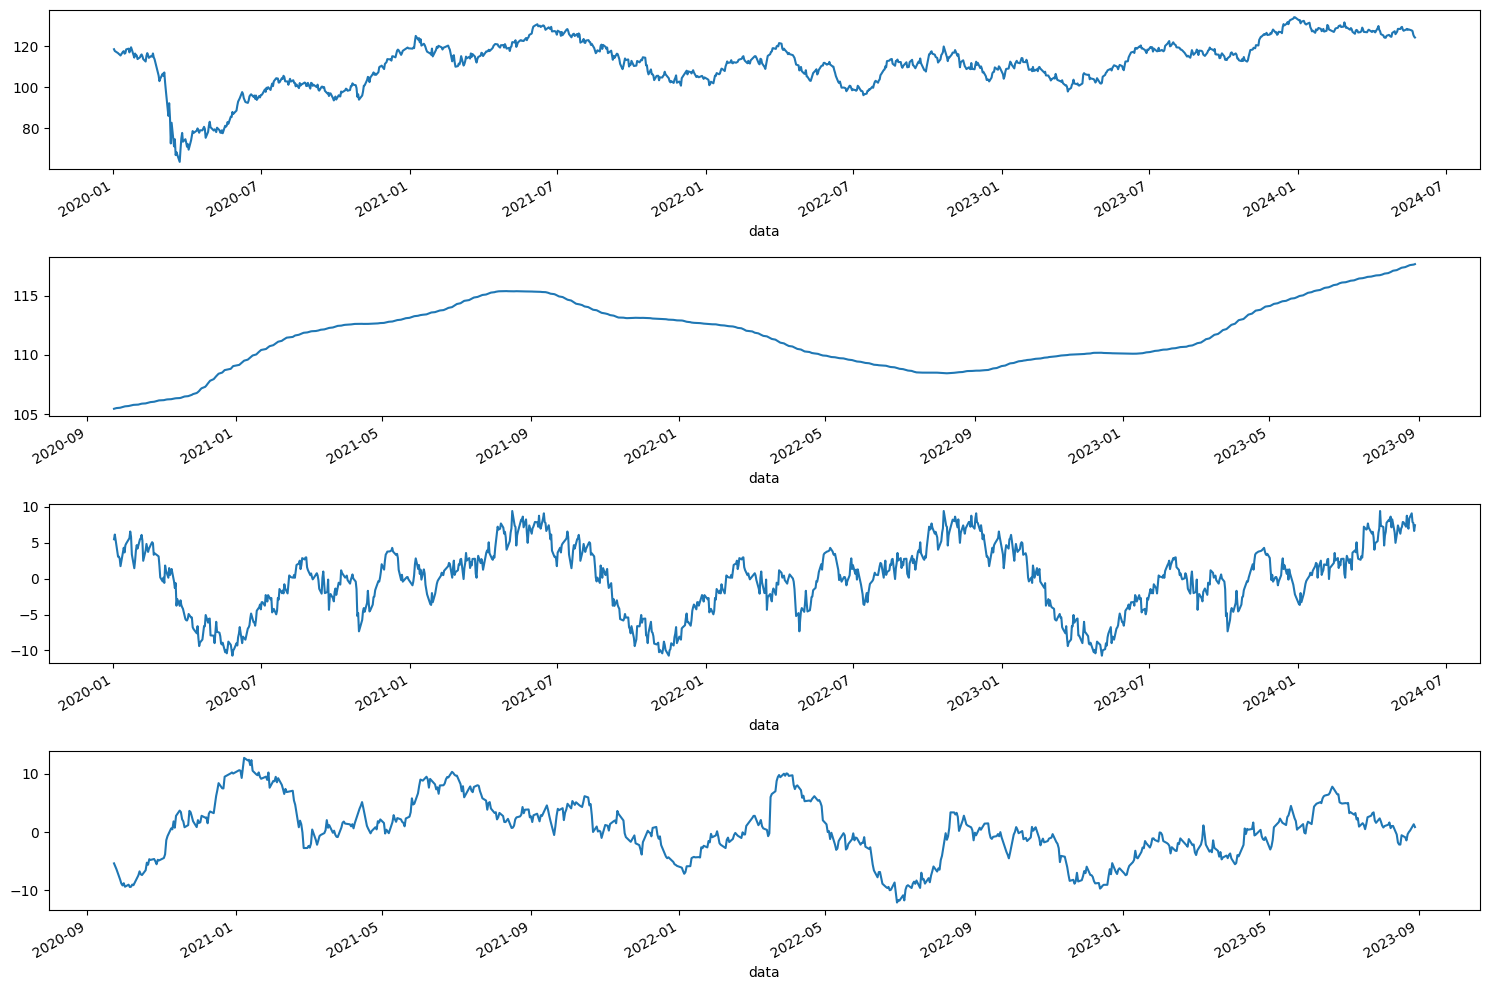

In [80]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)
plt.tight_layout()

In [81]:
x = df_data.ultimo.values

Quando pvalue for menor que 0.05% a série é estacionária

In [82]:
result = adfuller(x)

print("teste ADF")
print(f'teste estatístico {result[0]}')
print(f"pValue {result[1]}")

for key, valor in result[4].items():
    print(f"Valores críticos")
    print(f"\t{key}:{valor}")

teste ADF
teste estatístico -2.378746212466041
pValue 0.14782520174554337
Valores críticos
	1%:-3.4363857496063455
Valores críticos
	5%:-2.8642050392821794
Valores críticos
	10%:-2.5681889563132314


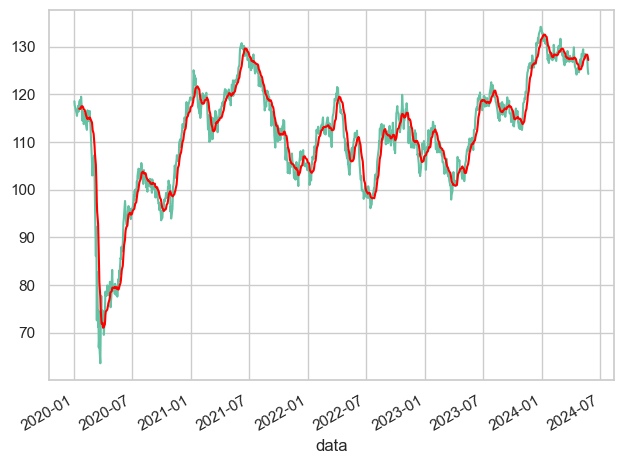

In [95]:
ma = df_data.rolling(12).mean()

fig, ax = plt.subplots()
df_data.plot(ax=ax,legend=False)
ma.plot(ax=ax, legend=False,color='r')
plt.tight_layout()

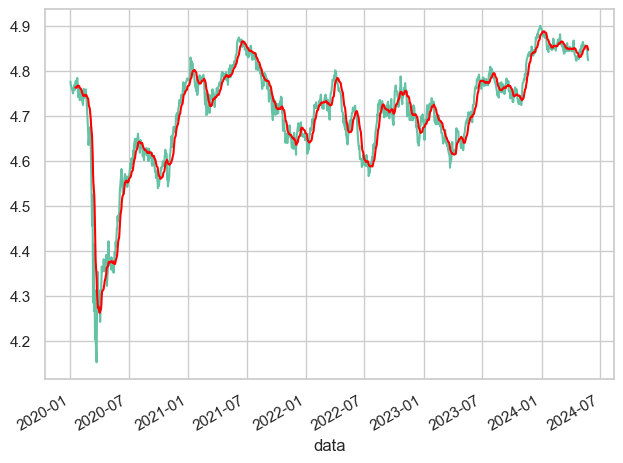

In [96]:
df_log = np.log(df_data)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax,legend=False)
ma_log.plot(ax=ax, legend=False,color='r')
plt.tight_layout()

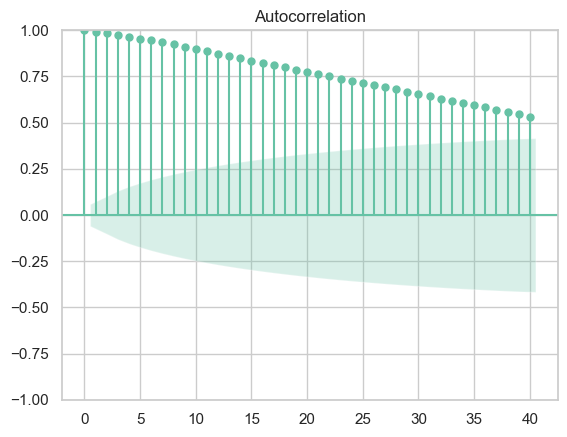

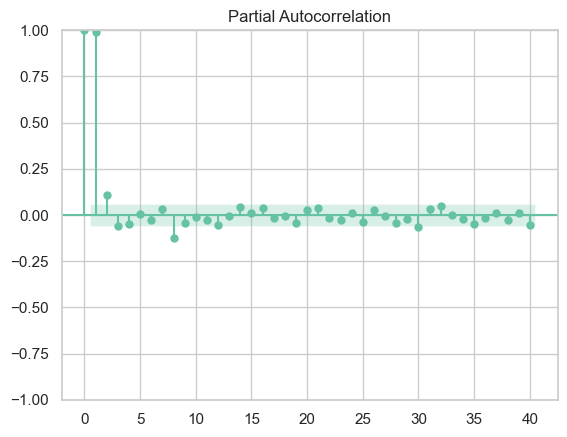

In [98]:
plot_acf(df_data['ultimo'], lags=40)
plot_pacf(df_data['ultimo'], lags=40)
plt.show()

In [161]:
model = auto_arima(df_data['ultimo'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4203.069, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4216.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4203.079, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4204.883, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4214.926, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4202.462, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4200.787, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4202.335, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4203.296, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4201.150, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4198.799, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4202.898, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4200.472, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4200.346, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [160]:
def arima_forecast(history):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

x = df_data.values
size = int(len(x) * 0.8)
train, test = x[0:size], x[size:len(x)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    yhat = arima_forecast(history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

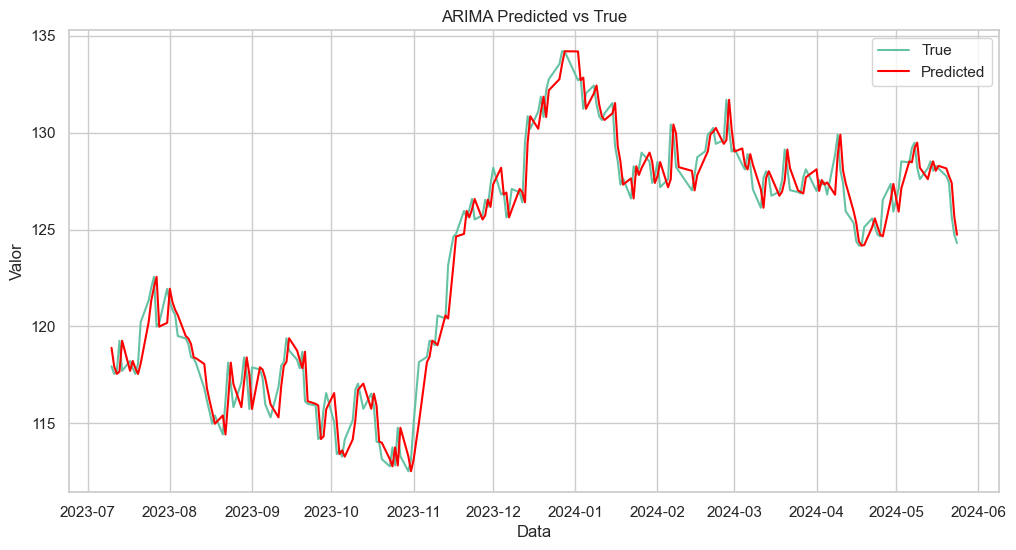

In [164]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df_data.iloc[size:,:].index, test, label='True')
plt.plot(df_data.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predicted vs True')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [168]:
r2 = r2_score(test,predictions)
print(r2)

0.9672942233964331


In [170]:
df_data_new = df_data['ultimo'].reset_index()
df_data_new.rename(columns={'ultimo': 'y','data': 'ds'}, inplace=True)
df_data_new.head()

,ds,y
0,2020-01-02,118.573
1,2020-01-03,117.707
2,2020-01-06,116.878
3,2020-01-07,116.662
4,2020-01-08,116.247


In [188]:
m = Prophet()
m.fit(df_data_new)

23:43:13 - cmdstanpy - INFO - Chain [1] start processing
23:43:13 - cmdstanpy - INFO - Chain [1] done processing


In [189]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1454,2025-05-20
1455,2025-05-21
1456,2025-05-22
1457,2025-05-23
1458,2025-05-24


In [190]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1454,2025-05-20,152.698932,106.718479,196.022990
1455,2025-05-21,153.049915,107.968384,195.885279
1456,2025-05-22,153.432246,106.155492,196.187117
1457,2025-05-23,153.719238,106.989482,196.614068
1458,2025-05-24,153.450758,107.850769,194.153688


In [191]:
plot_plotly(m, forecast)

In [201]:
plot_components_plotly(m, forecast)

In [200]:
prophet_df = forecast.set_index('ds')[['yhat']].join(df_data_new.set_index('ds').y).reset_index()
prophet_df.head()

,ds,yhat,y
0,2020-01-02,120.348218,118.573
1,2020-01-03,119.936033,117.707
2,2020-01-06,118.987352,116.878
3,2020-01-07,118.851166,116.662
4,2020-01-08,118.538914,116.247


In [198]:
prophet_df.dropna(inplace=True)

In [199]:
r2_score(prophet_df.y, prophet_df.yhat)

0.8748961085479595